This script tries to classify 25 Indian bird species. The used dataset is the one below:

https://www.kaggle.com/datasets/arjunbasandrai/25-indian-bird-species-with-226k-images

An accuracy of 85.6% is reached using Transfer learning technique.

Feature Extractor architecture is MobileNet based.

Resource:

Howard, Andrew G., et al. "Mobilenets: Efficient convolutional neural networks for mobile vision applications." arXiv preprint arXiv:1704.04861 (2017).

Reference Article: https://arxiv.org/abs/1704.04861

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras import backend as K
from tensorflow.keras.layers import Layer
from tensorflow.keras import initializers
import matplotlib.pyplot as plt
import math

In [2]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.0/255.0,
    validation_split=0.2)

train_data_dir = "/kaggle/input/25-indian-bird-species-with-226k-images/training_set/training_set/"

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(200,200),
    batch_size=256,
    class_mode='categorical',
    subset='training')

val_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(200,200),
    batch_size=256,
    class_mode='categorical',
    subset='validation')


Found 18106 images belonging to 25 classes.
Found 4514 images belonging to 25 classes.


In [3]:
MobileNet = tf.keras.applications.mobilenet.MobileNet(
    input_shape=(200,200, 3),
    include_top=False,
    weights='imagenet')
MobileNet.trainable = False

model = tf.keras.models.Sequential()
model.add(MobileNet)
layer_summary = [layer.summary() for layer in model.layers]


    

17225924/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 100, 100, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 100, 100, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 100, 100, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 100, 100, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 100, 100, 32

In [4]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(25, activation='softmax'))

In [5]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=7e-5),
    loss="categorical_crossentropy",
    metrics=['accuracy']
)


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 6, 6, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 36864)             0         
                                                                 
 dense (Dense)               (None, 25)                921625    
                                                                 
Total params: 4,150,489
Trainable params: 921,625
Non-trainable params: 3,228,864
_________________________________________________________________


In [7]:
epochs_len = 12
history = model.fit(
    train_generator,
    epochs=epochs_len,
    batch_size=256,
    verbose=1,
    validation_data=val_generator)

Epoch 1/12
71/71 [==============================] - 688s 10s/step - loss: 1.7130 - accuracy: 0.5743 - val_loss: 0.8431 - val_accuracy: 0.7556
Epoch 2/12
71/71 [==============================] - 551s 8s/step - loss: 0.4880 - accuracy: 0.8573 - val_loss: 0.6721 - val_accuracy: 0.8046
Epoch 3/12
71/71 [==============================] - 549s 8s/step - loss: 0.2656 - accuracy: 0.9275 - val_loss: 0.6272 - val_accuracy: 0.8208
Epoch 4/12
71/71 [==============================] - 548s 8s/step - loss: 0.1540 - accuracy: 0.9645 - val_loss: 0.5982 - val_accuracy: 0.8310
Epoch 5/12
71/71 [==============================] - 550s 8s/step - loss: 0.0936 - accuracy: 0.9851 - val_loss: 0.5730 - val_accuracy: 0.8383
Epoch 6/12
71/71 [==============================] - 547s 8s/step - loss: 0.0605 - accuracy: 0.9937 - val_loss: 0.5702 - val_accuracy: 0.8429
Epoch 7/12
71/71 [==============================] - 541s 8s/step - loss: 0.0415 - accuracy: 0.9978 - val_loss: 0.5582 - val_accuracy: 0.8494
Epoch 8/12
7

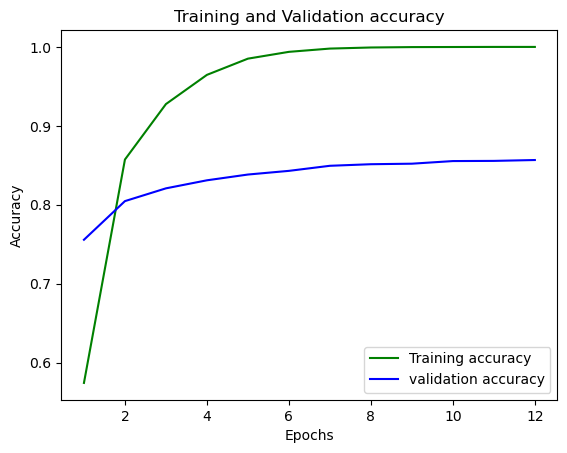

In [8]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1,history.epoch[-1]+2)
plt.plot(epochs, train_accuracy, 'g', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

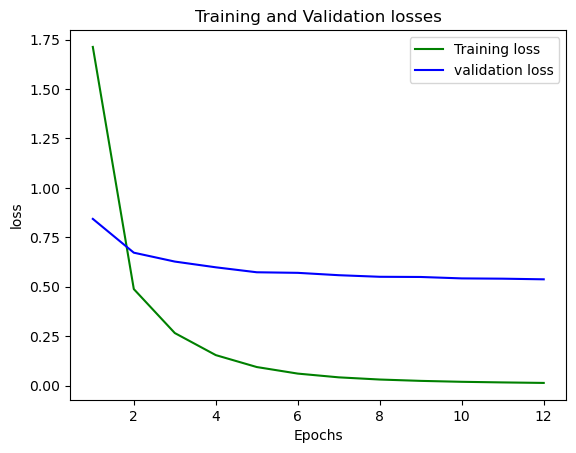

In [9]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, train_loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and Validation losses')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()